In [176]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
import time
from os import listdir
from os.path import isfile, join
import re

plt.rcParams.update(plt.rcParamsDefault)

# Non-Pharmaceutical Interventions in Canada

Here we show comparisons of descriptive statistics for each regional and subregional-level dataset across Canada. Download individual region CSVs from the Google Sheet and place them in `./data/`. 

Stats Canada data on population size by province available from: 

Statistics Canada. Table 17-10-0009-01 Population estimates, quarterly"
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901
DOI: https://doi.org/10.25318/1710000901-eng


In [177]:
stats_columns=[
    'file',
    'region',
    'subregion', 
    'rows',
    'columns',
    'start_date.min', 
    'start_date.max', 
    'end_date.min', 
    'end_date.max', 
    'end_date.count / count', 
    'reviewer.unique', 
    'intervention_summary.unique', 
    'intervention_category.unique',
    'target_population_category.unique',
    'target_population_category (% not "General")',
    'enforcement_category.unique',
    'oxford_government_response_category.notna',
    'oxford_government_response_category.unique',
    'oxford_fiscal_measure_cad.sum',
    'source_url.unique'
]

columns=[
    'start_date',
    'end_date',
    'reviewer',
    'country',
    'region',
    'subregion',
    'intervention_summary',
    'intervention_category',
    'target_population_category',
    'enforcement_category',
    'oxford_government_response_category',
    'oxford_closure_code',
    'oxford_public_info_code',
    'oxford_travel_code',
    'oxford_geographic_target_code',
    'oxford_fiscal_measure_cad',
    'oxford_monetary_measure',
    'oxford_testing_code',
    'oxford_tracing_code',
    'source_url',
    'source_organization',
    'source_organization_2',
    'source_category',
    'source_title',
    'source_full_text',
    'note'
]

In [178]:
population_df = pd.read_csv('data/statscan-population-q.csv', thousands=',')
population_df[['Geography', 'Q1 2020']]
population_df['region'] = population_df['Geography']
population_df['population_q1_2020'] = pd.to_numeric(population_df['Q1 2020'])
population_df = population_df[['region', 'population_q1_2020']]
population_df

,region,population_q1_2020
0,Canada,37894799
1,Newfoundland and Labrador,521365
2,Prince Edward Island,158158
3,Nova Scotia,977457
4,New Brunswick,779993
5,Quebec,8537674
6,Ontario,14711827
7,Manitoba,1377517
8,Saskatchewan,1181666
9,Alberta,4413146


In [272]:
full_df = pd.read_csv('Collecting NPIs Effects - FULL.csv')
full_df['start_date'] = pd.to_datetime(full_df['start_date'], format='%m/%d/%Y')
full_df['end_date'] = pd.to_datetime(full_df['end_date'], format='%m/%d/%Y')
full_df['oxford_fiscal_measure_cad'] = full_df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)

full_df = full_df[full_df['start_date'] <= '04-19-2020']

provinces_df = full_df[full_df['subregion'].isna() & full_df['region'].notna() & (full_df['region'] != "All")]

federal_df = full_df[full_df['subregion'].isna() & (full_df['region'].isna() | (full_df['region'] == "All"))]

In [273]:
full_df.shape

(2517, 26)

In [274]:
provinces_df.shape

(1288, 26)

In [275]:
federal_df.shape

(67, 26)

In [276]:
full_df.drop(columns=['reviewer']).to_csv('npi_canada.csv')
provinces_df.drop(columns=['reviewer']).to_csv('npi_by_province.csv')
federal_df.drop(columns=['reviewer']).to_csv('npi_federal.csv')

# Descriptive Statistics for Paper

In [277]:
print("Number of interventions recorded: ", full_df.shape[0])

Number of interventions recorded:  2517


In [278]:
print("Number of oxford interventions recorded: ", full_df['oxford_government_response_category'].count())

Number of oxford interventions recorded:  1269


In [279]:
n = full_df[~full_df['oxford_government_response_category'].isin(['S8 Fiscal measures', 'S9 Monetary measures (interest rate)', 'S10 Emergency investment in health care', 'S11 Investment in vaccines', 'S12 Testing policy', 'S13 Contact tracing'])]['oxford_government_response_category'].count()
print("Number of oxford interventions in Stringency Index recorded (S1-S7): ", n)

Number of oxford interventions in Stringency Index recorded (S1-S7):  920


In [280]:
n / full_df.shape[0]

0.3655145013905443

In [281]:
print("Number of unique source urls: ", len(full_df['source_url'].unique()))

Number of unique source urls:  1443


In [282]:
print("Number of unique primary source organizations: ", len(full_df['source_organization'].unique()))

Number of unique primary source organizations:  241


In [283]:
oxford_ratio = full_df['oxford_government_response_category'].count() / full_df['intervention_category'].count()
print("% of interventions with oxford classifications: ", oxford_ratio)



% of interventions with oxford classifications:  0.5112812248186946


# NPIs before Key Dates

In [284]:
full_11_df = full_df[full_df['start_date'] < '2020-03-11']
print("Number of interventions recorded before may 11: ", full_11_df.shape[0])
print("Number of interventions recorded before may 11 (%): ", full_11_df.shape[0] / full_df.shape[0])


Number of interventions recorded before may 11:  137
Number of interventions recorded before may 11 (%):  0.05442987683750496


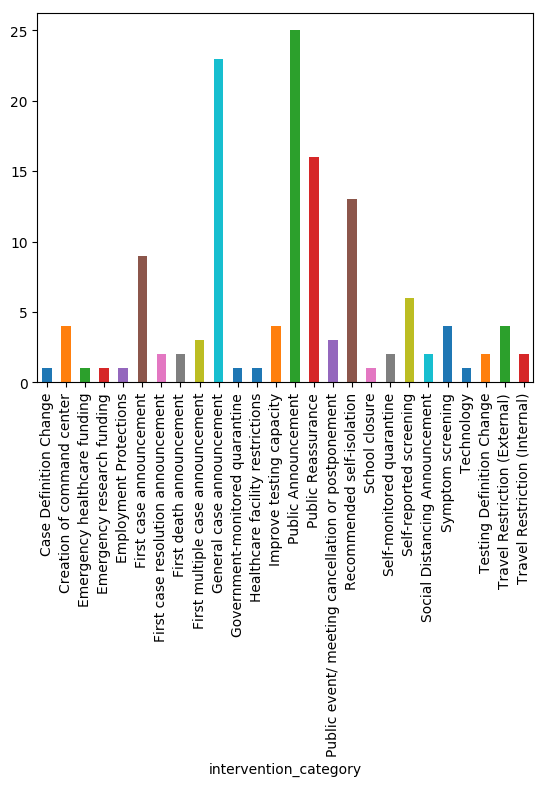

In [295]:
full_11_df.groupby(by='intervention_category')['start_date'].count().plot.bar()

In [286]:
full_1_df = full_df[full_df['start_date'] < '2020-01-25'] # first case
print("Number of interventions recorded before Jan 25: ", full_1_df.shape[0])
print("Number of interventions recorded before Jan 25 (%): ", full_1_df.shape[0] / full_df.shape[0])


Number of interventions recorded before Jan 25:  9
Number of interventions recorded before Jan 25 (%):  0.003575685339690107


In [271]:
9 / full_df.shape[0]

0.003575685339690107

In [269]:
full_1_df['intervention_category'].unique()

array(['Emergency economic funding', 'Public Announcement',
       'Public Reassurance', 'Self-reported screening',
       'Symptom screening', 'Improve testing capacity'], dtype=object)

In [270]:
full_1_df

start_date   end_date        reviewer country            region  \
165  2020-01-03 2020-12-31  Margot          Canada  All                
173  2020-01-23 NaT         Jeff            Canada  All                
846  2020-01-23 NaT         Vinyas Harish   Canada  Ontario            
847  2020-01-07 NaT         Vinyas Harish   Canada  Ontario            
1191 2020-01-21 NaT         Nykan           Canada  British Columbia   
1192 2020-01-21 NaT         Nykan           Canada  British Columbia   
1193 2020-01-20 NaT         Jeff            Canada  British Columbia   
1484 2020-01-24 NaT         Jonathan Smith  Canada  Ontario            
1485 2020-01-22 NaT         Jonathan Smith  Canada  Ontario            
1978 2020-01-07 NaT         Andrew T Lam    Canada  Nunavut            

     subregion  \
165   NaN        
173   NaN        
846   Toronto    
847   Toronto    
1191  NaN        
1192  NaN        
1193  NaN        
1484  NaN        
1485  NaN        
1978  NaN        

                                                                                                              intervention_summary  \
165   Ground Lease Rents for Airport Authorities Waived                                                                              
173   Chief Public Health Officer and Deputy Chief Public Health Officer holds presser for coronavirus                               
846   Media briefing on Toronto's coronavirus preparedness plan                                                                      
847   Statement on undiagnosed viral pneumonia in China                                                                              
1191  Screening for individuals arriving in airports                                                                                 
1192  Infection control practitioners, ED staff and primary care provides informed to screen for coronavirus symptoms and exposure   
1193  Testing made available in BC                                                                                                   
1484  Screening at international airports for travelers from Wuhan                                                                   
1485  Novel coronavirus added as designated disease with reporting requirement                                                       
1978  Nunavut’s new Public Health Act came into force January 1, replacing the version carried over from the Northwest Territories   

           intervention_category target_population_category  \
165   Emergency economic funding  Businesses                  
173   Public Announcement         General                     
846   Public Reassurance          General                     
847   Public Reassurance          General                     
1191  Self-reported screening     Returning Travellers        
1192  Symptom screening           Healthcare Workers          
1193  Improve testing capacity    General                     
1484  Self-reported screening     Returning Travellers        
1485  Public Announcement         Healthcare Workers          
1978  Public Announcement         General                     

     enforcement_category ...  oxford_monetary_measure  oxford_testing_code  \
165   Not Applicable      ...   NaN                    NaN                    
173   Not Applicable      ...   NaN                    NaN                    
846   Not Applicable      ...   NaN                    NaN                    
847   Not Applicable      ...   NaN                    NaN                    
1191  Not Applicable      ...   NaN                    NaN                    
1192  Not Applicable      ...   NaN                    NaN                    
1193  Not Applicable      ...   NaN                    NaN                    
1484  Not Applicable      ...   NaN                    NaN                    
1485  Not Applicable      ...   NaN                    NaN                    
1978  Not Applicable      ...   NaN                   

## NPI: Enforcement Categories


In [191]:
len(full_df['enforcement_category'].unique())

6

In [192]:
full_df.groupby(by='enforcement_category').count().max(axis=1).sort_values()

enforcement_category
Arrest              6   
Legal Action        39  
Fines               76  
Refusal of Entry    166 
Not Applicable      2147
dtype: int64

Text(0.5,0,'count')

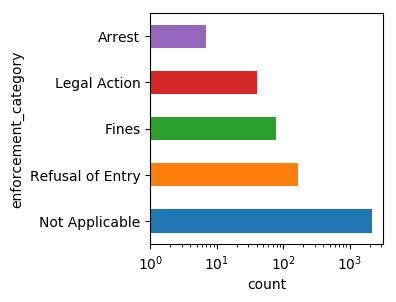

In [193]:
full_df.groupby(by="enforcement_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(3,3))
plt.xlabel('count')

## Target Population Categories

In [194]:
len(full_df['target_population_category'].unique())

17

Text(0.5,0,'count')

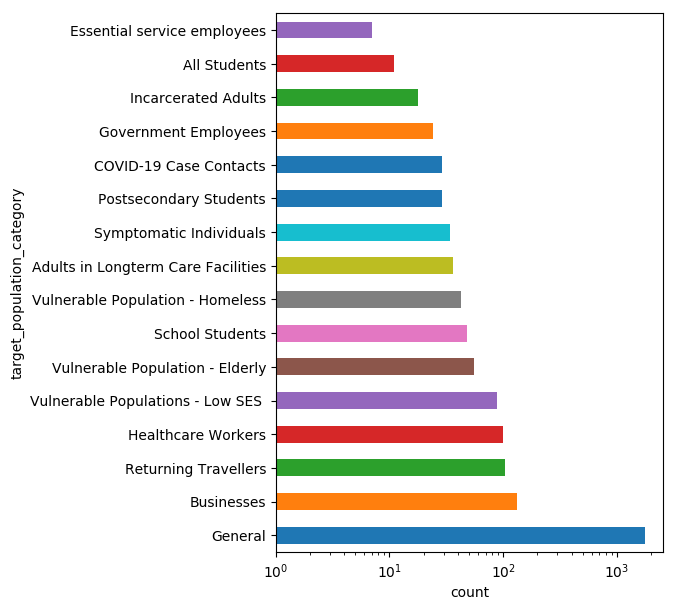

In [195]:
full_df.groupby(by="target_population_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(5,7))
plt.xlabel('count')

## NPI: Intervention Categories

In [196]:
len(full_df['intervention_category'].unique())

63

Lets show examples of the top 15 interventions by count

In [197]:
intervention_counts = pd.DataFrame(full_df.groupby(by='intervention_category').count().max(axis=1))

In [198]:
pd.set_option('display.max_colwidth', -1)

examples = pd.DataFrame(full_df.groupby(by='intervention_category').apply(lambda x: x.sample(1, random_state=3)['intervention_summary'].values[0]))

intervention_counts.merge(examples, left_index=True, right_index=True).sort_values(by='0_x', ascending=False)[0:17]



,0_x,0_y
intervention_category,,
Public Announcement,298,"Being released today is the Government of Yukon’s guidelines for critical, essential and non-essential service workers. This guidelines document will help local and non-local workers understand how to comply with the rules and protect themselves and Yukoners from COVID-19."
General case announcement,217,"Announce 11 new cases, total 64 in BC"
Emergency economic funding,166,Extend tax filling and tax payment deadlines for businesses
Social Distancing Announcement,130,​People looking to enjoy the outdoors are reminded to stay closer to home
Emergency social services funding,104,Supplying technology to families with children in care to enable video/phone/email/text contact
Administrative flexibility,90,"Business, taxi and animal licences due to expire at the end of March have been extended to May 31"
Non-essential workplace closure,83,Mandatory closure of all non-essential workplaces
Public event/ meeting cancellation or postponement,76,Suspend bookings for memorial services at Mountain View Cemetery Celebration Hall
Healthcare facility restrictions,75,"Banned certain individuals from visiting hospitals (Individuals who have travelled outside of Yukon in the last 14 days, or who are feeling sick)."


In [199]:
full_df[full_df['oxford_government_response_category'].isna()].groupby(by='intervention_category').count().max(axis=1).sort_values(ascending=False)


intervention_category
Public Announcement                                   195
General case announcement                             156
Administrative flexibility                            69 
Social Distancing Announcement                        58 
Healthcare facility restrictions                      57 
Declaration of emergency (or similar)                 44 
Emergency social services funding                     38 
Public Reassurance                                    36 
Health workforce task-shifting                        35 
Public park closure                                   33 
Recommended self-isolation                            29 
Improve testing capacity                              28 
Emergency economic funding                            26 
Employment Protections                                26 
Social Service provider restrictions                  25 
Increased sanitation measures                         24 
Creation of command center                        

Text(0.5,0,'count')

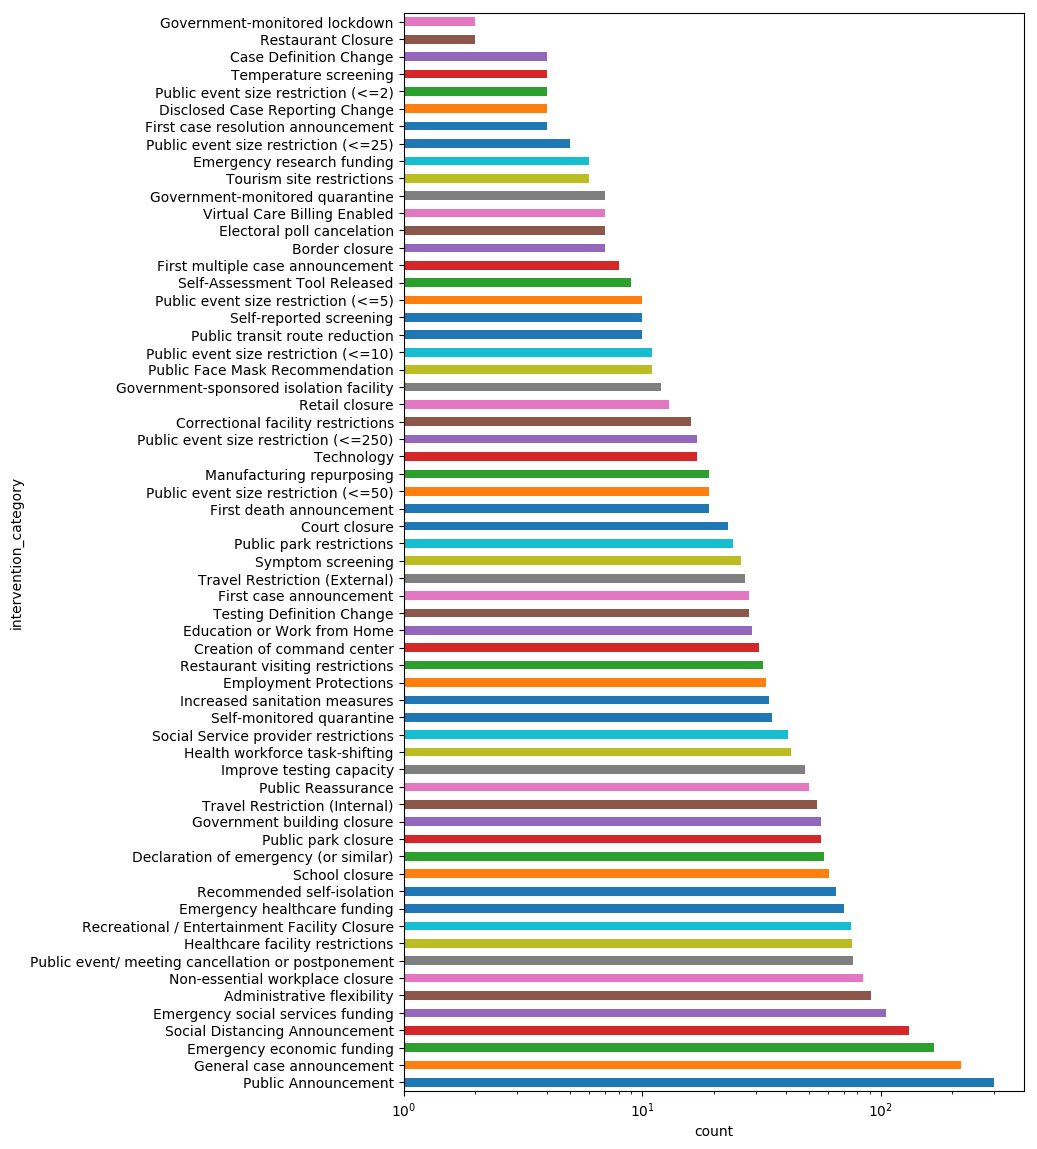

In [200]:

full_df.groupby(by="intervention_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(8,14))
plt.xlabel('count')


# Sources

Looking at unique source urls, organizations, and source types

In [201]:
a = full_df['source_organization'].unique()
a.shape

(241,)

In [202]:
b = full_df['source_organization_2'].unique()

In [203]:
all_sources = list(set(a) | set(a))
len(all_sources)

241

## NPI: Fiscal Measures

Show investments by province or subregion

In [204]:
#fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-20-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')
provinces_fiscal = pd.DataFrame(dates)

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['cumulative'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    all_dates_df.set_index('start_date')
    all_dates_df = all_dates_df.groupby(by='start_date').sum()

    provinces_fiscal[g_name] = all_dates_df['cumulative']

#plt.yscale('log')
#plt.title('')
#plt.ylabel('Fiscal Interventions ($)')
#plt.xlabel('Date')

#provinces_fiscal

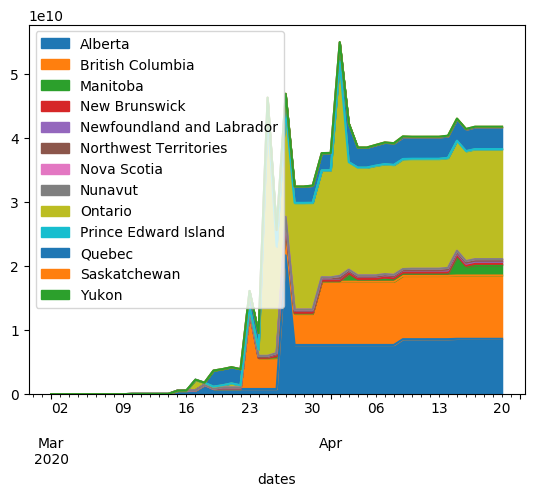

In [205]:
print("WARNING: Not Correct Yet")
provinces_fiscal.drop(['dates'], axis=1).plot.area()

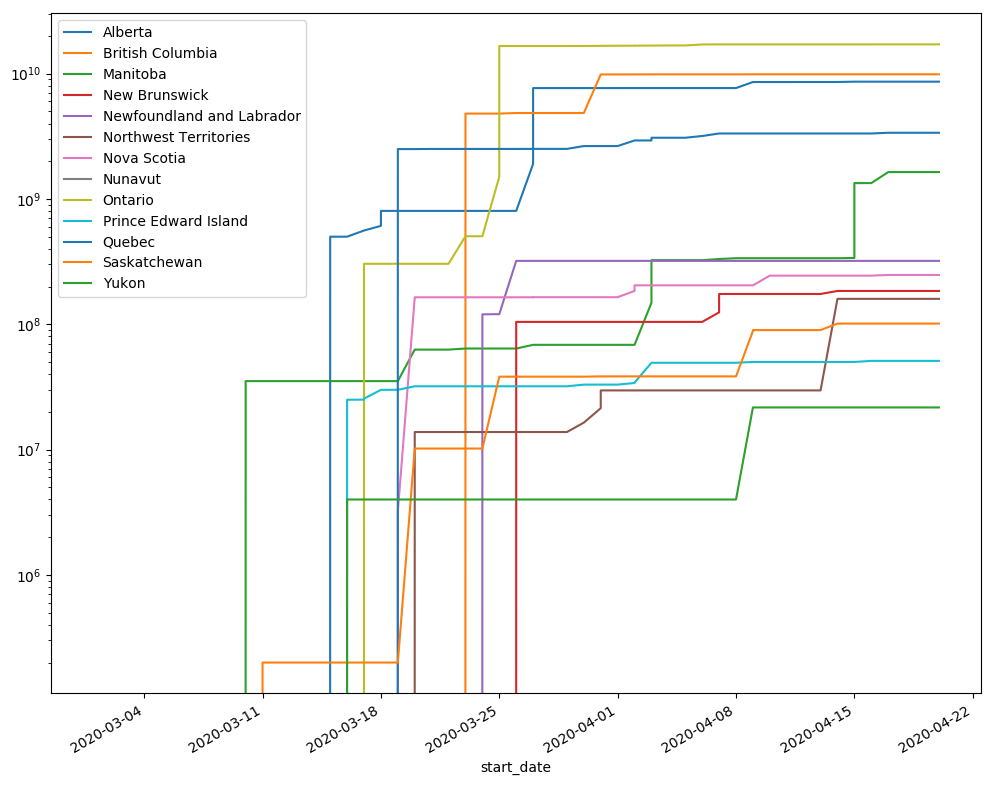

In [206]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-20-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)
    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

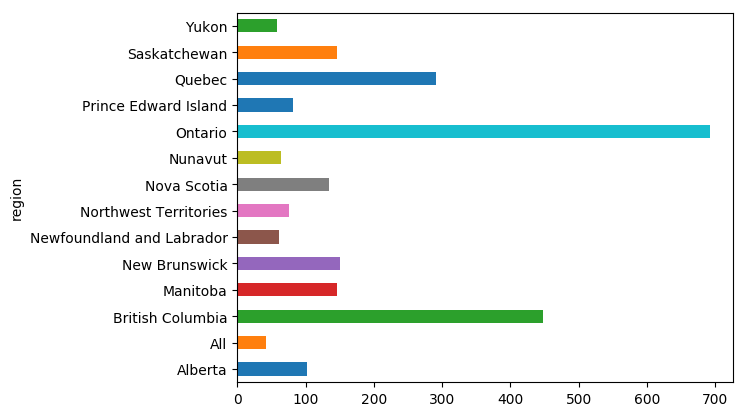

In [207]:
full_df.groupby(by=['region']).count().max(axis=1).plot.barh()

In [208]:
full_df.groupby(by=['region'])['start_date'].quantile(0.5).sort_values()

region
All                         2020-03-15 12:00:00
British Columbia            2020-03-23 00:00:00
Newfoundland and Labrador   2020-03-23 00:00:00
Nunavut                     2020-03-23 00:00:00
Ontario                     2020-03-23 00:00:00
Saskatchewan                2020-03-23 00:00:00
Northwest Territories       2020-03-23 12:00:00
Quebec                      2020-03-24 00:00:00
Nova Scotia                 2020-03-24 12:00:00
Prince Edward Island        2020-03-25 00:00:00
New Brunswick               2020-03-26 00:00:00
Alberta                     2020-03-27 00:00:00
Yukon                       2020-03-27 00:00:00
Manitoba                    2020-04-02 12:00:00
Name: start_date, dtype: datetime64[ns]

# NPI: Distribution of Events

In [209]:
full_df['start_date'].quantile(0.5)

Timestamp('2020-03-24 00:00:00')

In [210]:
provinces_df['start_date'].quantile(0.5)

Timestamp('2020-03-25 00:00:00')

In [211]:
full_df['start_date'].quantile(0.5)

Timestamp('2020-03-24 00:00:00')

In [212]:
median_dates = provinces_df.groupby(by='region')['start_date'].quantile(0.5)
median_dates

region
Alberta                     2020-03-27 00:00:00
British Columbia            2020-03-23 00:00:00
Manitoba                    2020-04-05 00:00:00
New Brunswick               2020-03-26 00:00:00
Newfoundland and Labrador   2020-03-23 00:00:00
Northwest Territories       2020-03-23 12:00:00
Nova Scotia                 2020-03-27 00:00:00
Nunavut                     2020-03-23 00:00:00
Ontario                     2020-03-23 00:00:00
Prince Edward Island        2020-03-25 00:00:00
Quebec                      2020-03-25 00:00:00
Saskatchewan                2020-03-23 00:00:00
Yukon                       2020-03-27 00:00:00
Name: start_date, dtype: datetime64[ns]

In [213]:
min_dates = provinces_df.groupby(by='intervention_category')['start_date'].min()
min_dates

intervention_category
Administrative flexibility                           2020-03-18
Border closure                                       2020-03-16
Case Definition Change                               2020-03-23
Correctional facility restrictions                   2020-03-13
Court closure                                        2020-03-15
Creation of command center                           2020-03-02
Declaration of emergency (or similar)                2020-03-13
Disclosed Case Reporting Change                      2020-03-30
Education or Work from Home                          2020-03-13
Electoral poll cancelation                           2020-03-14
Emergency economic funding                           2020-03-16
Emergency healthcare funding                         2020-03-10
Emergency research funding                           2020-03-11
Emergency social services funding                    2020-03-17
Employment Protections                               2020-03-10
First case announc

In [214]:
print("The median intervention dates for provinces and territories falls between ", median_dates.min(), " and ", median_dates.max())

The median intervention dates for provinces and territories falls between  2020-03-23 00:00:00  and  2020-04-05 00:00:00


In [215]:
cma_med_dates = full_df.dropna(subset=['subregion']).groupby(by=['subregion'])['start_date'].quantile(0.5)
cma_med_dates

subregion
Calgary              2020-04-02 00:00:00
Edmonton             2020-03-28 00:00:00
Gatineau             2020-03-24 00:00:00
Halifax              2020-03-22 00:00:00
Hamilton             2020-03-19 00:00:00
Kelowna              2020-03-24 00:00:00
Kitchener-Waterloo   2020-03-17 12:00:00
London               2020-03-30 00:00:00
Montreal             2020-03-24 00:00:00
Niagara              2020-03-21 00:00:00
Oshawa               2020-03-19 00:00:00
Ottawa               2020-04-06 00:00:00
Quebec City          2020-03-21 12:00:00
Regina               2020-03-20 00:00:00
Saskatoon            2020-03-23 00:00:00
St. John's           2020-03-23 00:00:00
Toronto              2020-03-21 00:00:00
Vancouver            2020-03-20 00:00:00
Victoria             2020-03-22 00:00:00
Windsor              2020-03-17 00:00:00
Winnipeg             2020-03-20 12:00:00
Name: start_date, dtype: datetime64[ns]

In [216]:
print("The median intervention dates for CMAs falls between ", cma_med_dates.min(), " and ", cma_med_dates.max())

The median intervention dates for CMAs falls between  2020-03-17 00:00:00  and  2020-04-06 00:00:00


DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')


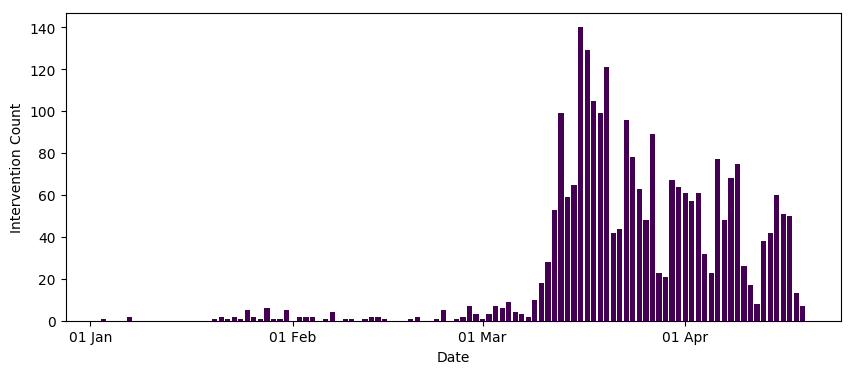

In [217]:
import matplotlib.dates as mdates
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10,4))

xticks = pd.date_range(start='12-01-2019', end='03-31-2020', freq='M')
#subset = full_df[full_df['start_date'] < pd.to_datetime('04-01-2020')]
ts = full_df.groupby(by=['start_date'])['intervention_category'].count()

cmap = mpl.cm.get_cmap('viridis')
plt.bar(ts.index, ts.values, color=cmap(0))

plt.xlabel('Date')
plt.ylabel('Intervention Count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)
print(xticks)

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')


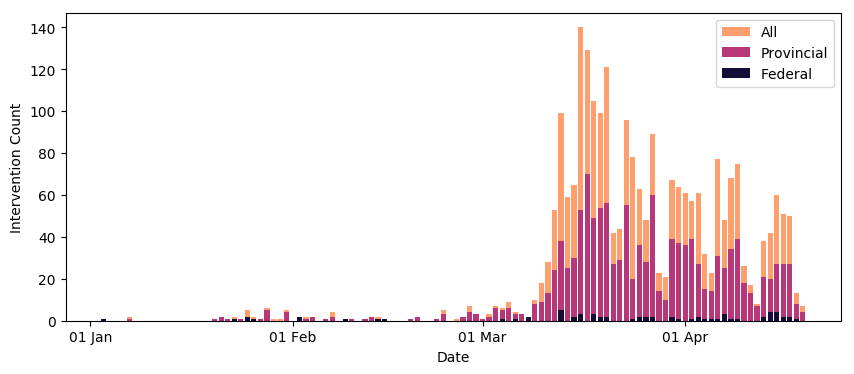

In [218]:
import matplotlib.dates as mdates
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 4))

xticks = pd.date_range(start='12-01-2019', end='04-19-2020', freq='M')
#subset = full_df[full_df['start_date'] < pd.to_datetime('04-01-2020')]


cmap = mpl.cm.get_cmap('magma')


ts = full_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.8), label='All')

ts = provinces_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.5), label='Provincial')

ts = federal_df.groupby(by=['start_date'])['intervention_category'].count()
plt.bar(ts.index, ts.values, color=cmap(0.1), label='Federal')



plt.xlabel('Date')
plt.ylabel('Intervention Count')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)
print(xticks)
plt.legend()

#ts = full_df.subtract(provinces_df).groupby(by=['start_date'])['intervention_category'].count()
#cmap = mpl.cm.get_cmap('viridis')
#plt.bar(ts.index, ts.values, color=cmap(.5), alpha=0.4)
plt.savefig('doc/img/fig2.png', dpi=300)

In [219]:
names = full_df['region']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

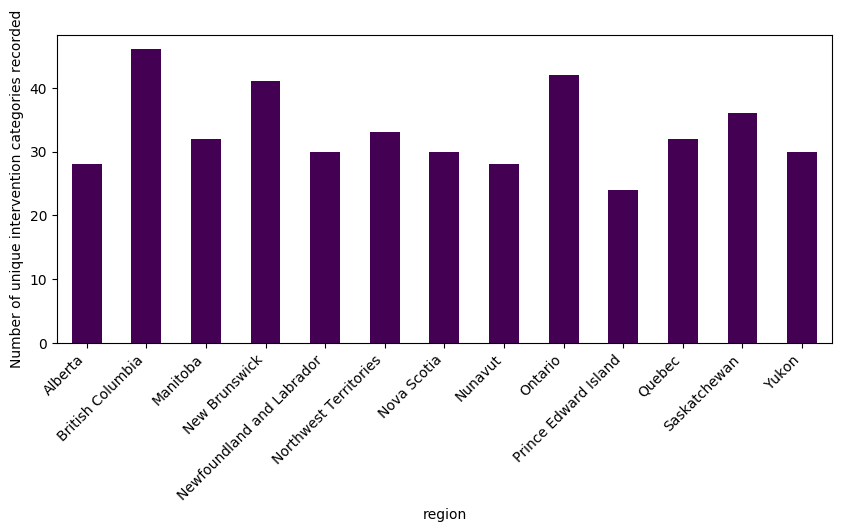

In [220]:
import matplotlib.ticker as ticker
provinces_df.dropna(subset=['region']).groupby(by=['region'])['intervention_category'].nunique().plot.bar(figsize=(10,4), cmap='viridis')
plt.ylabel('Number of unique intervention categories recorded')

#@ticker.FuncFormatter
#def major_formatter(x, pos):
#    return str(x).replace('(', '').replace('(', '')
#plt.gca().xaxis.set_major_formatter(major_formatter)
plt.xticks(rotation=45, ha='right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

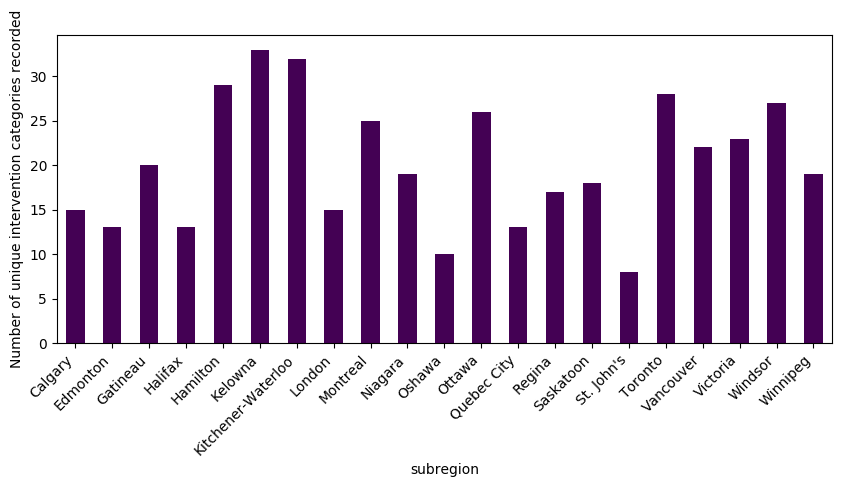

In [221]:
import matplotlib.ticker as ticker
subregions = full_df.dropna(subset=['subregion']).groupby(by=['subregion'])['intervention_category'].nunique()

subregions.plot.bar(figsize=(10,4), cmap='viridis')
plt.ylabel('Number of unique intervention categories recorded')

#@ticker.FuncFormatter
#def major_formatter(x, pos):
#    return str(x).replace('(', '').replace('(', '')
#plt.gca().xaxis.set_major_formatter(major_formatter)
plt.xticks(rotation=45, ha='right')


Text(0.5,0,'Number of unique Oxford interventions recorded')

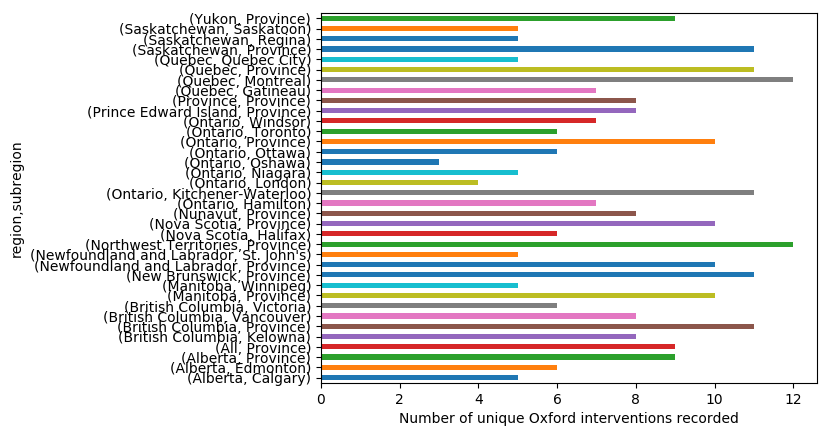

In [222]:
full_df.fillna('Province').groupby(by=['region', 'subregion'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford interventions recorded')


Text(0,0.5,'Unique Intervention Categories Recorded')

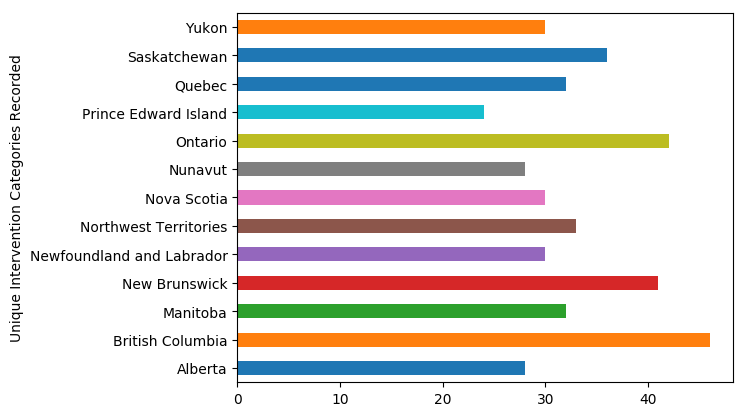

In [223]:
provinces_df.groupby(by='region')['intervention_category'].nunique().plot.barh()
plt.ylabel('Unique Intervention Categories Recorded')

Text(0.5,0,'Number of unique interventions recorded')

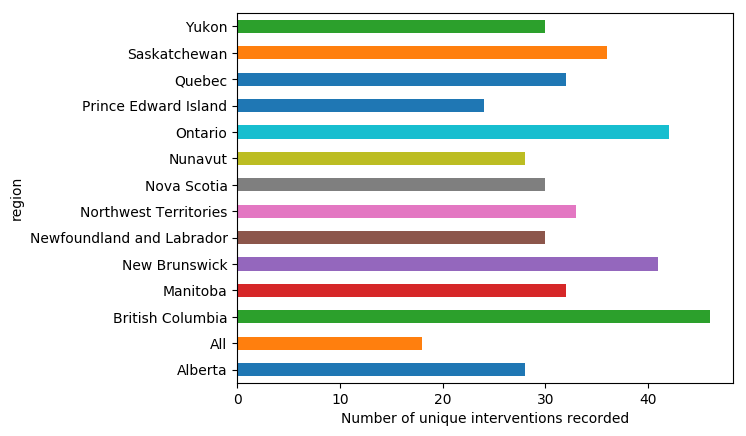

In [224]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['intervention_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')


Text(0.5,0,'Number of unique Oxford response measures recorded')

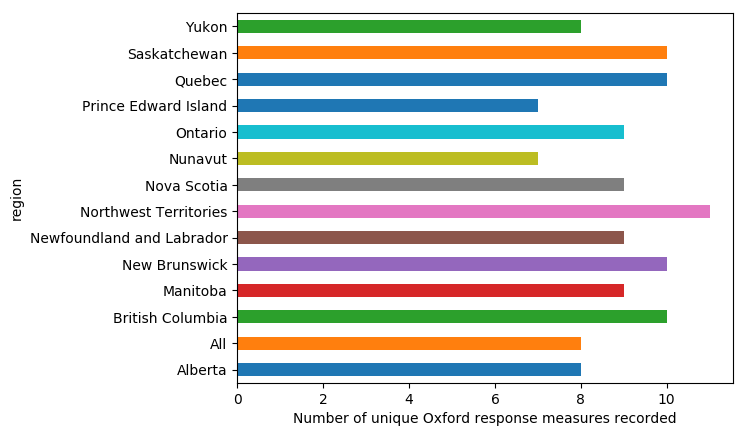

In [225]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford response measures recorded')


Text(0.5,0,'Oxford Fiscal Measure (CAD) recorded')

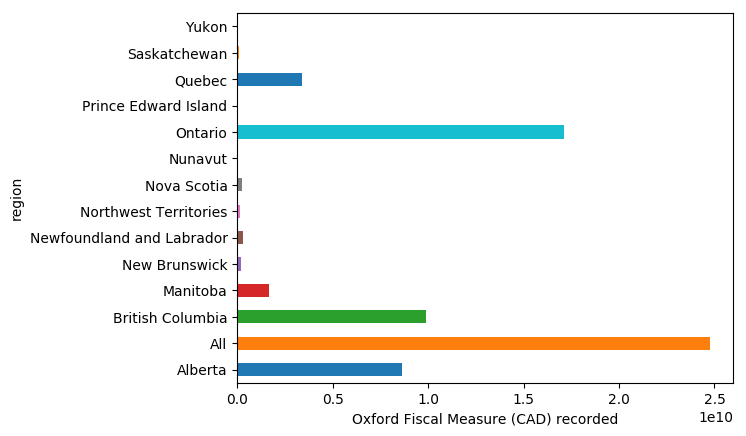

In [226]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum().plot.barh()
plt.xlabel('Oxford Fiscal Measure (CAD) recorded')


In [227]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum()

region
Alberta                      8.628300e+09
All                          2.474820e+10
British Columbia             9.875500e+09
Manitoba                     1.638265e+09
New Brunswick                1.845016e+08
Newfoundland and Labrador    3.205000e+08
Northwest Territories        1.595740e+08
Nova Scotia                  2.475100e+08
Nunavut                      0.000000e+00
Ontario                      1.711940e+10
Prince Edward Island         5.106000e+07
Quebec                       3.374500e+09
Saskatchewan                 1.013000e+08
Yukon                        2.170000e+07
Name: oxford_fiscal_measure_cad, dtype: float64

Text(0,0.5,'$ / person')

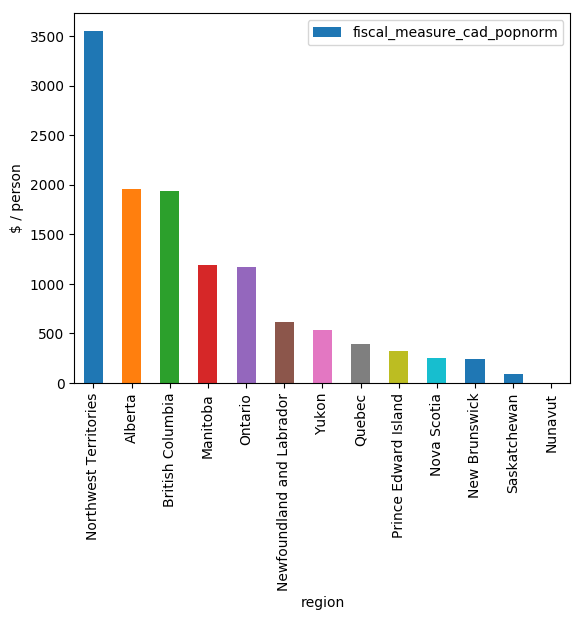

In [228]:
df = pd.DataFrame(provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum())
df['region'] = df.index
df = df.merge(population_df, on='region', how='left')
df['fiscal_measure_cad_popnorm'] = df['oxford_fiscal_measure_cad'] /  df['population_q1_2020']
df = df.sort_values(by='fiscal_measure_cad_popnorm', ascending=False)
df.plot.bar(x='region', y='fiscal_measure_cad_popnorm')
plt.ylabel("$ / person")

Text(0,0.5,'fiscal measures (CAD)')

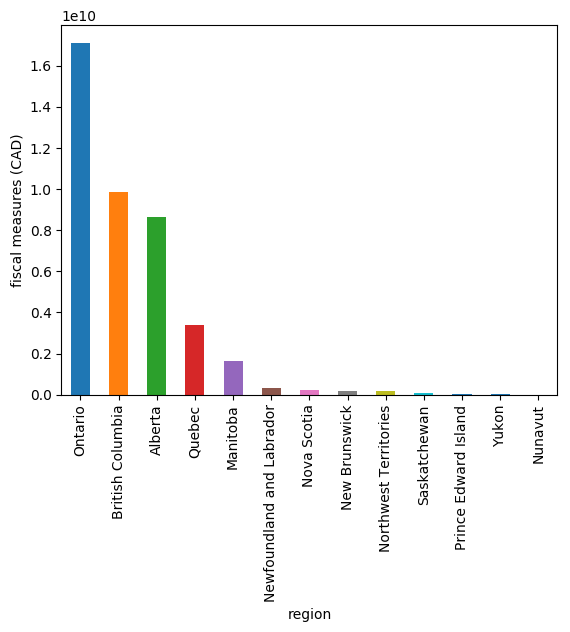

In [229]:
provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('fiscal measures (CAD)')

# Comparing Provincial and Municipal Interventions of the Same Type

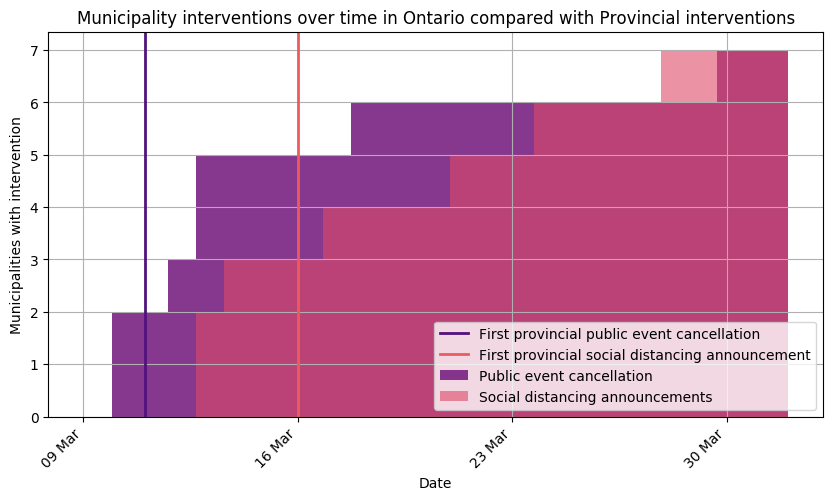

In [230]:
from matplotlib.dates import MO
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)

ont_df = full_df[full_df['region'] == 'Ontario']

cmap = mpl.cm.get_cmap('magma')

soc = ont_df[ont_df['intervention_category'] == 'Social Distancing Announcement']
#rec = ont_df[ont_df['intervention_category'] == 'Recreational / Entertainment Facility Closure']
pem = ont_df[ont_df['intervention_category'] == 'Public event/ meeting cancellation or postponement']
#park = ont_df[ont_df['intervention_category'] == 'Public park closure']

start = datetime(2020, 3, 9)
end = datetime(2020, 4, 1) 
drange=(start, end)

pem.groupby('subregion').min()['start_date'].hist(bins=50, range=drange, color=cmap(0.35),  alpha=0.9, cumulative=True, label='Public event cancellation')
#rec.groupby('subregion').min()['start_date'].hist(bins=30, color=cmap(0.8), alpha=0.5, cumulative=True, label='Recreational / Entertainment Facility Closure')
soc.groupby('subregion').min()['start_date'].hist(bins=50, range=drange, color=cmap(0.6), alpha=0.6, cumulative=True, label='Social distancing announcements')
#park.groupby('subregion').min()['start_date'].hist(color='red', alpha=0.5, label='Public park closure')

a = soc[soc['subregion'].isna()]
soc_ont = a[a['intervention_category'] == 'Social Distancing Announcement']
soc_ont_date = soc_ont['start_date'].min()

#a = rec[rec['subregion'].isna()]
#rec_ont = a[a['intervention_category'] == 'Recreational / Entertainment Facility Closure']
#rec_ont_date = rec_ont['start_date'].min()

plt.axvline(x=rec_ont_date, label='First provincial public event cancellation', color=cmap(0.25), linewidth=2)
plt.axvline(x=soc_ont_date, label='First provincial social distancing announcement', color=cmap(0.65), linewidth=2)

plt.xticks(rotation=45, ha='right')
plt.legend(loc="lower right")
plt.title('Municipality interventions over time in Ontario compared with Provincial interventions')

plt.xlabel('Date')
plt.ylabel('Municipalities with intervention')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(MO)))
month_format = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(month_format)


## Heatmap of cumulative municipal top intervention categories

In [231]:
# Thanks to matplotlib documentation for this

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [232]:
top_interventions = full_df.groupby(by='subregion')['intervention_category'].value_counts() \
    .groupby(by='intervention_category') \
    .count() \
    .sort_values(ascending=False)[:10] \
    
top_interventions

intervention_category
Public event/ meeting cancellation or postponement    19
Public Announcement                                   19
Social Distancing Announcement                        18
Recreational / Entertainment Facility Closure         18
Public park closure                                   17
Declaration of emergency (or similar)                 16
Administrative flexibility                            16
Government building closure                           15
Emergency economic funding                            13
Emergency social services funding                     13
Name: intervention_category, dtype: int64

In [233]:
cma_population= pd.DataFrame([['Toronto', 5429524],
                ["Montreal", 3519595],
                ["Vancouver", 2264823],
                ["Calgary", 1237656],
                ["Edmonton", 1062643],
                ["Ottawa", 989657],
                ["Gatineau", 989657],
                ["Winnipeg", 711925],
                ["Quebec City", 705103],
                ["Hamilton", 693645],
                ["Kitchener-Waterloo", 535154],
                ["London", 383437],
                ["Victoria", 335696],
                ["Halifax", 316701],
                ["Oshawa", 308875],
                ["Windsor", 287069],
                ["Saskatoon", 245181],
                ["Niagara", 229246],
                ["Regina", 214631],
                ["St. John's", 178427],
                ["Kelowna", 151957]], columns=['subregion', 'population'])
# Population numbers from Canadian Census 2016

In [234]:
filtered_df = full_df[full_df['intervention_category'].isin(top_interventions.index.values)]
#filtered_df = filtered_df.groupby(by=['subregion', 'start_date']).nunique()['intervention_category']
filtered_df = filtered_df.merge(cma_population, on='subregion')
filtered_df = filtered_df.sort_values(by='population', ascending=False)
soc_count = filtered_df.groupby(by=['subregion', 'intervention_category'], sort=False).min()['start_date']
#soc_count = soc_count.merge(cma_population, on='subregion')

xticks = pd.date_range(start='03-08-2020', end='04-19-2020', freq='W')


col = ['subregion', *xticks.date]
cma_df = pd.DataFrame()

for subregion in soc_count.index.get_level_values(0).unique():
    dates = soc_count.loc[[subregion]].reset_index()
    empty_row = [subregion]
    for week_end in xticks.values:
        count = dates[dates['start_date'] < week_end]['intervention_category'].count()
        empty_row.append(count)
    cma_df = cma_df.append([empty_row])
    
cma_df.columns = col
cma_df = cma_df.set_index('subregion')

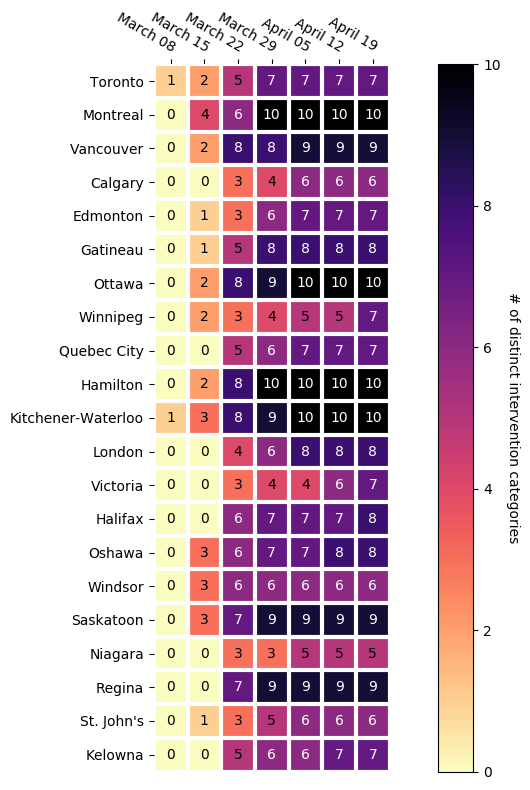

In [235]:
#fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,8))

nice_date = [x.strftime('%B %d') for x in cma_df.columns.values]

im, cbar = heatmap(cma_df.values, cma_df.index.values, nice_date, ax=ax,
                   cmap="magma_r", cbarlabel="# of distinct intervention categories")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
plt.savefig('doc/img/fig5.png', dpi=300)

# Mobility comparison

In [236]:
ox = full_df['oxford_government_response_category'].unique()

In [237]:
ox[2]

'S3 Cancel public events'

In [238]:
gb = provinces_df.groupby(by='region')
for gb_name, g in gb:
    for intervention in ox:
        rows = g[g['oxford_government_response_category'] == intervention]
        if ox[2] in rows['oxford_government_response_category']: # public events
            print(rows['oxford_closure_code'])

In [239]:
g['oxford_government_response_category'].mode()

0    S5 Public info campaigns        
1    S7 International travel controls
dtype: object

## Clustering Representation

For now just showing clustering on hand-applied labels.

In [240]:
>>> from sklearn import preprocessing
df = full_df.fillna(-1)

le_re = preprocessing.LabelEncoder()
le_re.fit(df['region'].astype(str).values)
le_ic = preprocessing.LabelEncoder()
le_ic.fit(df['intervention_category'].astype(str).values)
le_ec = preprocessing.LabelEncoder()
le_ec.fit(df['enforcement_category'].astype(str).values)
le_tp = preprocessing.LabelEncoder()
le_tp.fit(df['target_population_category'].astype(str).values)

LabelEncoder()

In [241]:
y = le_ic.transform(df['intervention_category'].astype(str))
X = np.array([
    le_re.transform(df['region'].astype(str)),
    le_ec.transform(df['enforcement_category'].astype(str)),
    le_tp.transform(df['target_population_category'].astype(str)),
    df['oxford_closure_code'].astype(int),
    df['oxford_public_info_code'].astype(int),
    df['oxford_travel_code'].astype(int),
    df['oxford_geographic_target_code'].astype(int)]).T

In [242]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X, y)
X_embedded

array([[ 28.448235 , -26.278555 ],
       [ 28.447468 , -26.272898 ],
       [ -4.122515 ,  -7.1861224],
       ...,
       [  5.906417 ,  25.926334 ],
       [ -8.940078 , -43.623196 ],
       [ -9.059618 , -42.15841  ]], dtype=float32)

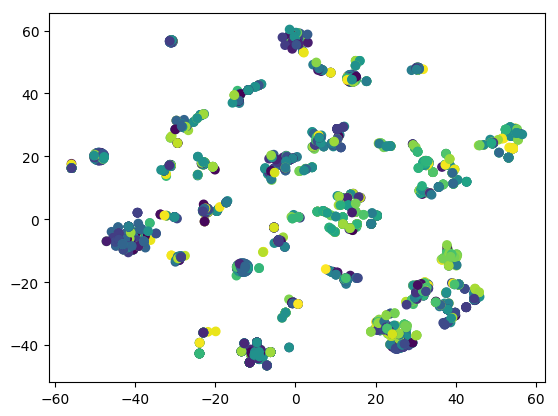

In [243]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)

# LDA on Intervention Text

Topics on full text just find regions. Need to remove all location-based markers from full text.

In [244]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text 

We choose to leave out geography-related words by marking them as stop words. This seems to prevent the model from picking up on the strong geographical topics in our selection of data and helps it discover other useful clusters.

In [245]:
r = [x.split() for x in full_df['region'].dropna().unique().tolist()]
r = np.hstack([np.array(x) for x in r])
sr = [x.split() for x in full_df['subregion'].dropna().unique().tolist()]
sr = np.hstack([np.array(x) for x in sr])
geo_stop_words = np.append(r, sr)
geo_stop_words = [x.lower() for x in geo_stop_words]
geo_stop_words = [x.replace('(','').replace(')','') for x in geo_stop_words]
stop_words = text.ENGLISH_STOP_WORDS.union(geo_stop_words)

We automate the selection of the number of topics by calculating the perplexity score for the model and minimizing across the number of topics.

In [246]:
def topic_selection(tf, tmax, tstep, debug=False):
    topic_sizes = np.arange(1, tmax, tstep)
    topic_ll = []
    topic_perplexity = []
    models = []
    for k in topic_sizes:


        n_topics = k

        lda = LatentDirichletAllocation(n_components=n_topics, 
            max_iter=10, 
            learning_method='online',
            learning_offset=50.,
            random_state=3).fit(tf)

        # use perplexity for now.. try gensim coherence later
        # see https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/topic_coherence_model_selection.ipynb
        topic_ll.append( lda.score(tf) )
        p = lda.perplexity(tf)
        topic_perplexity.append( p )
        models.append(lda)
        
        if (debug):
            print('Topics: ', k, ' perplexity ', p)
    
    idx = np.where(topic_perplexity == np.amin(topic_perplexity))[0][0]
    selected_lda = models[idx]
    ntopics = topic_sizes[idx]
    return topic_sizes, topic_perplexity, selected_lda, ntopics

In [247]:
def show_topk_words(lda, k, tf_feature_names):
    n_top_words = k
    for topic_i, topic in enumerate(lda.components_):
        print( "Topic ", topic_i )
        print( "Words: ", [tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]] )
        

### Full Source Text

Here we apply LDA to the full text of each source (except french sources)

In [248]:
len(full_df['source_url'].unique()) / full_df.shape[0]

0.5733015494636472

In [249]:
# Remove french
engl_df = full_df[full_df['region'] != 'Quebec']
full_text = engl_df['source_full_text'].drop_duplicates().astype(str)
data = full_text.values
data = [re.sub('\s+', ' ', text) for text in data] # remove new lines
data = [re.sub("\'", "", text) for text in data] # remove quotes
len(data)

1291

In [250]:
n_words = 1000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words=stop_words)
tf = tf_vectorizer.fit_transform( data )
tf_feature_names = tf_vectorizer.get_feature_names()

In [251]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

Selected  15  topics


Text(0,0.5,'perplexity')

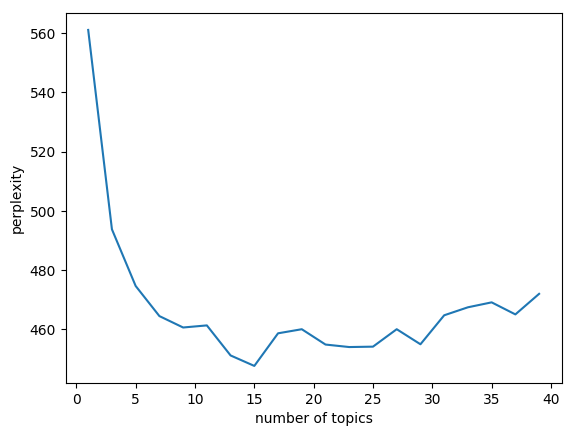

In [252]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [253]:
show_topk_words(lda, 15, tf_feature_names)

Topic  0
Words:  ['said', 'cases', 'zone', 'higgs', 'russell', 'individual', 'aged', 'region', 'brunswickers', 'fredericton', 'confirmed', 'number', 'people', 'testing', '50']
Topic  1
Words:  ['essex', 'ahmed', 'wechu', 'morrison', 'islanders', 'county', 'support', 'communities', 'nwt', 'help', 'education', 'pei', 'canada', 'measures', 'food']
Topic  2
Words:  ['collection', 'waste', 'garbage', 'changes', 'region', '19', 'covid', 'residents', 'service', 'services', 'household', 'large', 'staff', 'items', 'help']
Topic  3
Words:  ['wechu', 'essex', 'waterloo', 'county', 'ahmed', 'closure', 'unit', 'municipal', 'tissue', 'says', 'appropriate', 'healthcare', 'current', 'extension', 'permit']
Topic  4
Words:  ['com', 'twitter', 'ca', 'facebook', 'instagram', 'media', 'cityofto', 'residents', 'businesses', 'information', 'economic', 'music', 'culture', 'innovation', 'leader']
Topic  5
Words:  ['covid', '19', 'support', 'government', 'businesses', 'help', 'food', 'business', 'minister', 'ec

# LDA on Intervention Summary Text

In [254]:
full_summaries = full_df['intervention_summary'].drop_duplicates().astype(str)

In [255]:

n_words = 200

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words='english')
tf = tf_vectorizer.fit_transform( full_summaries )
tf_feature_names = tf_vectorizer.get_feature_names()

In [256]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

Selected  13  topics


Text(0,0.5,'perplexity')

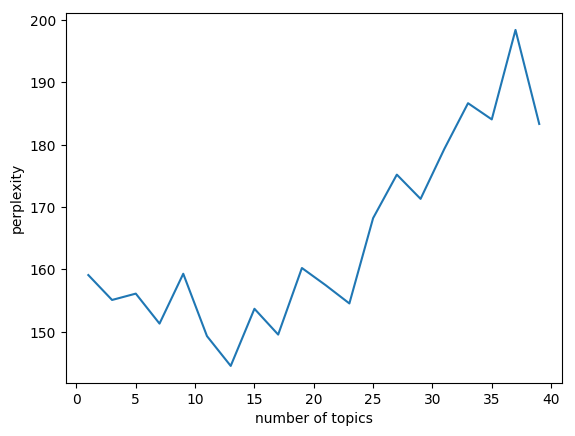

In [257]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [258]:
show_topk_words(lda, 20, tf_feature_names)

Topic  0
Words:  ['care', 'testing', 'term', 'long', 'centre', 'facilities', 'hospital', 'child', 'homes', 'visitors', 'patients', 'screening', 'hospitals', 'workers', 'staff', 'family', 'capacity', 'visits', 'healthcare', 'centres']
Topic  1
Words:  ['home', 'local', 'pandemic', 'work', 'employees', 'working', 'stay', 'funding', 'use', 'hospital', 'possible', 'response', 'recommendation', 'government', 'seniors', 'additional', 'children', 'kelowna', 'staff', 'critical']
Topic  2
Words:  ['essential', 'non', 'travel', 'community', 'food', 'quebec', 'canada', 'businesses', 'medical', 'outside', 'economic', 'organizations', 'recommended', 'protect', 'suspended', 'avoid', 'related', 'individuals', 'hospital', 'possible']
Topic  3
Words:  ['manitoba', 'waterloo', 'million', 'april', 'ensure', 'spread', 'region', 'programs', 'provincial', 'plan', 'toronto', 'payments', 'council', 'march', 'additional', 'winnipeg', 'canada', 'kelowna', 'announcement', 'yukon']
Topic  4
Words:  ['support', 'h